In [ ]:
#Linear Regression 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
# Load and preprocess the dataset
# Using the California housing dataset as Boston dataset is deprecated
california = fetch_california_housing()

In [3]:
# Convert the dataset to a Pandas DataFrame for easy manipulation
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target 

In [4]:
# Split the dataset into features and target variable
X = df.drop('PRICE', axis=1)  
y = df['PRICE']  

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

In [9]:
# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R-squared: 0.58


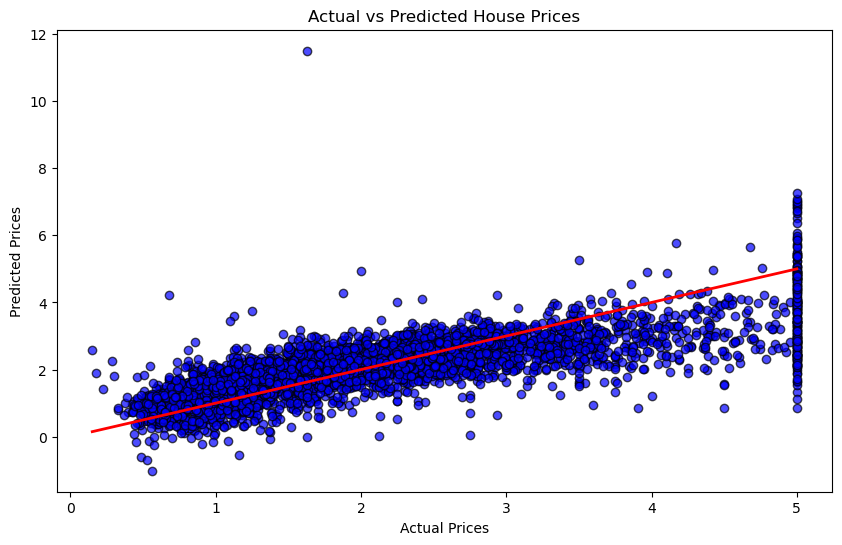

In [10]:
# Visualize the results
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [11]:
# Visualize the residuals
residuals = y_test - y_pred

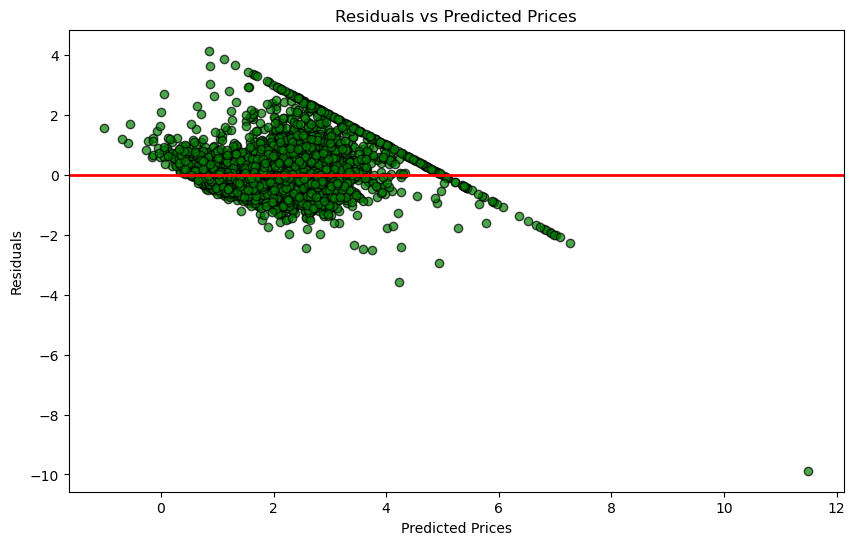

In [12]:
#plot the figure
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='red', linewidth=2)
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

In [13]:
# Interpretation of the coefficients
coefficients = model.coef_
feature_names = X.columns

In [14]:
# Print the coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"Coefficient for {feature}: {coef:.2f}")

Coefficient for MedInc: 0.45
Coefficient for HouseAge: 0.01
Coefficient for AveRooms: -0.12
Coefficient for AveBedrms: 0.78
Coefficient for Population: -0.00
Coefficient for AveOccup: -0.00
Coefficient for Latitude: -0.42
Coefficient for Longitude: -0.43


In [15]:
# Predict the price of a new house 
new_house = np.array([[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]])
new_price = model.predict(new_house)
print(f"Predicted Price for the new house: {new_price[0]:.2f}")

Predicted Price for the new house: 4.15


/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
